In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

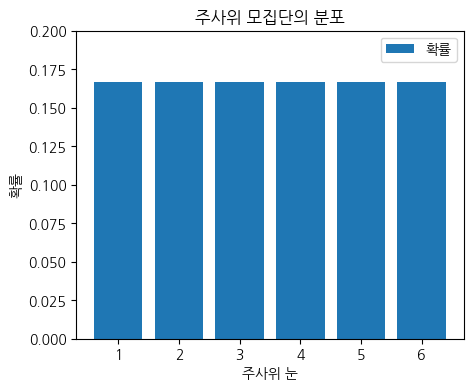

In [3]:
모집단 = [1,2,3,4,5,6]
plt.figure(figsize=(5,4))
plt.hist(모집단, bins=np.arange(1,8) - 0.5, density=True, rwidth=0.8, label='확률')
plt.xlabel("주사위 눈")
plt.ylabel("확률")
plt.title("주사위 모집단의 분포")
plt.ylim(0, 0.2)
plt.legend()
plt.show()

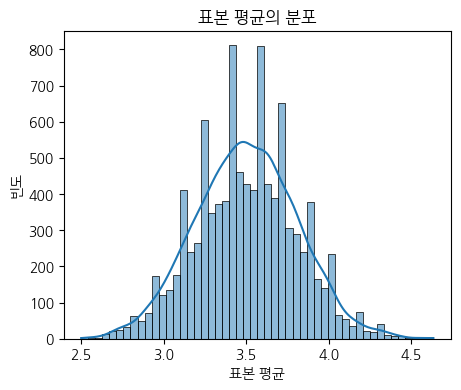

In [4]:
sample = [np.random.choice(모집단, size=30).mean() for x in range(10000)]
plt.figure(figsize=(5,4))
sns.histplot(sample, kde=True, bins=50)
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.title("표본 평균의 분포")
# plt.ylim(0, 0.2)
# plt.legend()
plt.show()


In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [14]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [16]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


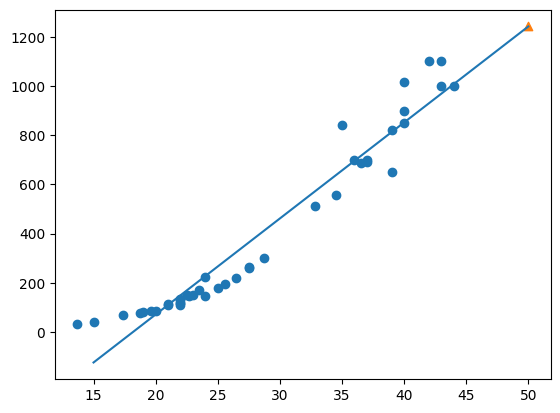

In [17]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [18]:
#R^2확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [19]:
train_poly2 = np.column_stack((train_input ** 2, train_input))
test_poly2 = np.column_stack((test_input ** 2, test_input))

In [24]:
lr2 = LinearRegression()
lr2.fit(train_poly2, train_target)

print(lr2.predict([[50**2, 50]]))

[1573.98423528]


In [29]:
print(lr2.coef_, lr2.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


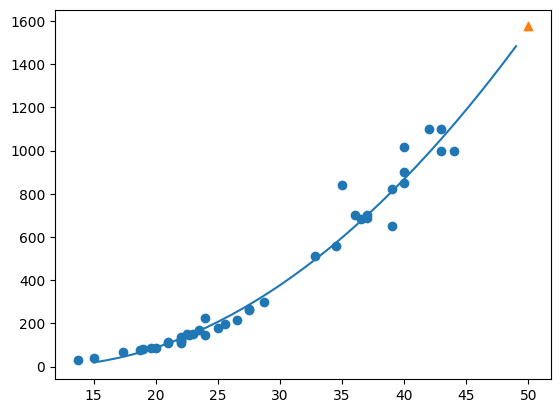

In [21]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

In [32]:
print(lr2.score(train_poly2, train_target))
print(lr2.score(test_poly2, test_target))

0.9706807451768623
0.9775935108325122


In [26]:
train_poly3 = np.column_stack((train_input ** 3, train_input))
test_poly3 = np.column_stack((test_input ** 3, test_input))

In [ ]:
lr3 = LinearRegression()
lr3.fit(train_poly3, train_target)

[253.25656548]


In [33]:
print(lr3.score(train_poly3, train_target))
print(lr3.score(test_poly3, test_target))

0.9685810598234801
0.970422926350451


In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

In [39]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)


In [40]:
housing['data']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [43]:
import pandas as pd

In [47]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2353/16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [45]:
raw_df.shape

(1012, 11)

In [ ]:
boston_df = pd.read_csv("./data/house_price.csv")
target = boston_df.pop('MEDV')

In [56]:
import seaborn as sns

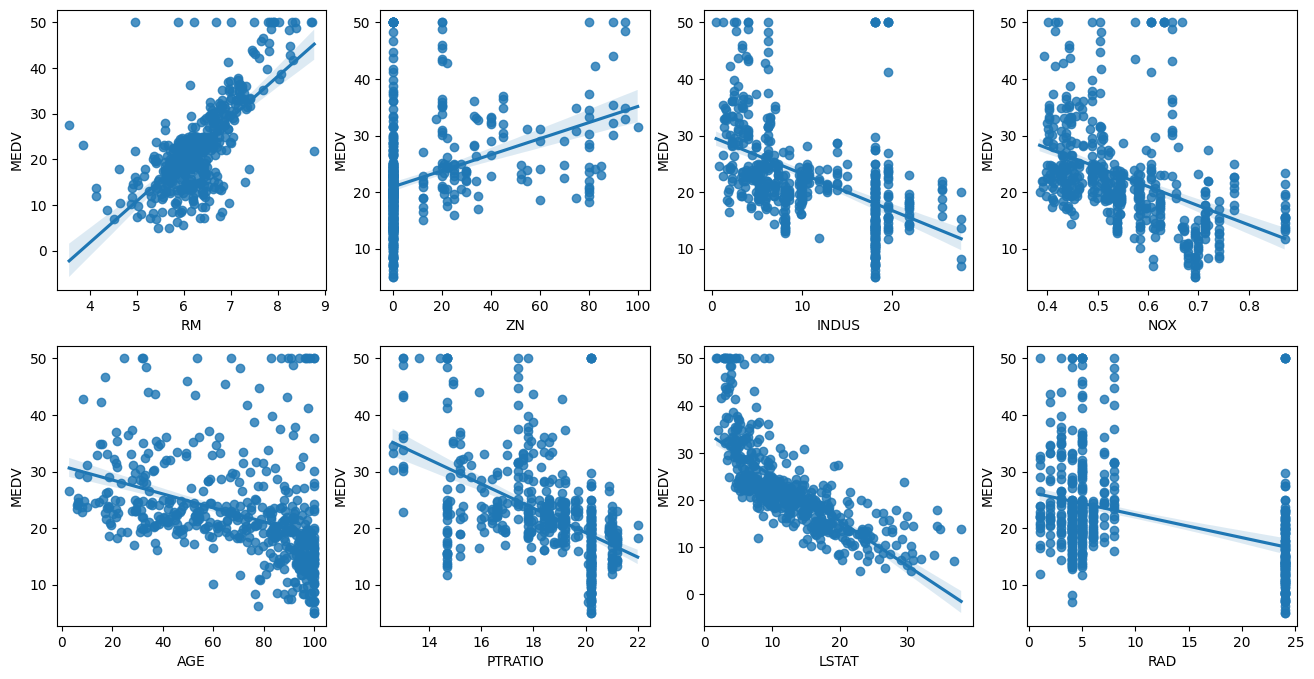

In [57]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for idx, feature in enumerate(features):
    row = int(idx/4)
    col = idx % 4
    sns.regplot(x=feature, y=target, data = boston_df, ax=axs[row][col])

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
x_train, x_test, y_train, y_test = train_test_split(boston_df, target, test_size = 0.2, random_state = 42)

In [ ]:
boston_df.drop('CAT.MEDV', axis=1, inplace=True)

In [66]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
mean_squared_error(y_test, lr.predict(x_test))

15.626711460817015

In [ ]:
r2_score(y_test, lr.predict(x_test))